# 📊 Unión y Limpieza de datos del Dataset  

---

**Objetivo del Notebook**  
Limpieza de datos, columnas innecesarias y valores nulos/blancos 

**Contexto del análisis**  
- Dataset de muestra proporcionado + csv proporcionado unido en un único excel dataset
- Enfoque en aprendizaje, validación del pipeline y comprensión del proceso

**Valor devuelto**  
- Copia del Dataset de muestra proporcionado completamente limpio y útil 

---




In [1]:
import pandas as pd
import utils
# ===============================
# LEER EL ARCHIVO LIMPIO
# ===============================
dfs = pd.read_excel(r'C:\Users\0017655\Downloads\DataSET_SF.xlsx', sheet_name=None)

# Ver la primera hoja
oportunidad = list(dfs.values())[0]
cuenta = list(dfs.values())[1]
ecb = list(dfs.values())[2]
solicitud_ban = list(dfs.values())[3]
casos = list(dfs.values())[4]
correos = list(dfs.values())[5]
historial_actividad = list(dfs.values())[6]
historial_etapas = list(dfs.values())[7]


print(historial_etapas.head())

    LK_Oportunidad__c       PL_Etapa__c PL_Subetapa__c  \
0  0061r00000yz6vuAAA  Propuesta centro       Validada   
1  0061r00000yz6vuAAA        Resolución      Publicada   
2  0061r00000yz6vuAAA  Propuesta centro       Validada   
3  0061r00000yz6vuAAA        Resolución      Publicada   
4  0061r00000yz6vuAAA  Propuesta centro       Validada   

                    CreatedDate  CH_Completa_principal__c  \
0  2022-08-02T13:02:10.000+0000                     False   
1  2022-08-02T13:02:10.000+0000                     False   
2  2022-08-02T13:02:36.000+0000                     False   
3  2022-08-03T06:58:58.000+0000                     False   
4  2022-08-03T06:59:30.000+0000                     False   

             Fecha_fin_etapa__c  
0  2022-08-02T13:02:10.000+0000  
1  2022-08-02T13:02:37.000+0000  
2  2022-08-03T06:58:58.000+0000  
3  2022-08-03T06:59:30.000+0000  
4  2022-08-03T07:18:19.000+0000  


In [2]:
from utils import analisis_na_por_columna
analisis_na_por_columna(oportunidad)
analisis_na_por_columna(cuenta)
analisis_na_por_columna(ecb)
analisis_na_por_columna(solicitud_ban)
analisis_na_por_columna(casos)
analisis_na_por_columna(correos)
analisis_na_por_columna(historial_actividad)
analisis_na_por_columna(historial_etapas)

,columna,total_na,porcentaje_na
0,PL_Subetapa__c,104829,21.385294
1,Fecha_fin_etapa__c,57580,11.746418
2,LK_Oportunidad__c,0,0.000000
3,PL_Etapa__c,0,0.000000
4,CreatedDate,0,0.000000
5,CH_Completa_principal__c,0,0.000000


In [3]:
from utils import analisis_na_por_columna, eliminar_columnas_na, crear_target_auditado


# ===============================
# LIMPIEZA DE NAS
# ===============================

oportunidad = eliminar_columnas_na(oportunidad)
cuenta = eliminar_columnas_na(cuenta)
ecb = eliminar_columnas_na(ecb)
solicitud_ban = eliminar_columnas_na(solicitud_ban)
casos = eliminar_columnas_na(casos)
correos = eliminar_columnas_na(correos)
historial_actvidad = eliminar_columnas_na(historial_actividad)
historial_etapas = eliminar_columnas_na(historial_etapas)

# ===============================
# CREACION DEL TARJET
# ===============================

# Ejecución
target = crear_target_auditado(oportunidad, historial_etapas)
target



--- INICIANDO AUDITORÍA DE INTEGRIDAD ---
Total IDs en Maestro Oportunidades: 47386
Total IDs en Historial Etapas: 59888
✅ Coincidencias exactas: 47383
⚠️ IDs en Maestro pero SIN historial: 3 (Posibles registros huérfanos)
⚠️ IDs en Historial pero NO en Maestro: 12505 (Oportunidades eliminadas o filtradas)

--- RESUMEN TARGET ---
Matrículas Finales (Target=1): 11806
Tasa de Conversión Total: 24.91%


,ID,ACCOUNTID,PL_CURSO_ACADEMICO,PL_TIPO_ACCESO,RECORDTYPEID,RECORDTYPENAME,PL_ESTADO,STAGENAME,PL_SUBETAPA,CH_SIMULTANEIDAD,...,CH_CONDITIONED,CH_SOLICITA_ALOJAMIENTO,NOCONTABILIZABLE,PL_MODALIDAD_EXAMEN_ACCESO_ESC,KITDEVISADO,NU_PASOMAX,NU_PASO_SOLICITUD_ADMISION,CH_ACEPTO_CONDICIONES_MATRICUL,PL_DOMICILIO_DURANTE_CURSO,target
0,0061r00001KLSSJAA5,0011r00002YMDC6AAP,2022/2023,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Validado,Reorientación,Respuesta candidato,false,...,False,False,False,Online,False,1.0,10.0,False,NaN,0
1,0066900001W1pVKAAZ,0016900002mntULAAY,2022/2023,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Pendiente de validar,Cerrada/Perdida,NaN,false,...,False,False,False,Presencial,False,3.0,6.0,False,NaN,0
2,0066900001cHyR5AAK,0016900002vnx7kAAA,2022/2023,Acceso a primero,012w0000000K4QTAA0,Solicitud Matricula Grado,Pendiente de validar,Matrícula OOGG,Formalizada,false,...,False,False,False,Online,False,9.0,9.0,False,5.0,1
3,0066900001MevZwAAJ,0016900002aNZZuAAO,2022/2023,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Validado,Pruebas de admisión,No presentado,false,...,False,False,False,Presencial,False,1.0,10.0,False,NaN,0
4,0066900001VzuaIAAR,0016900002jiFCfAAM,2022/2023,Acceso a primero,012w0000000K4QTAA0,Solicitud Matricula Grado,Pendiente de validar,Matrícula OOGG,Formalizada,false,...,False,False,False,Presencial,False,9.0,9.0,False,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47381,006Vl00000yBsguIAC,001Tr00000Ono13IAB,2026/2027,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Pendiente de validar,Inicio,NaN,false,...,False,False,False,Online,False,1.0,3.0,False,NaN,0
47382,006Vl000010Nz8jIAC,001Vl00001FJK20IAH,2026/2027,Acceso a primero,012w0000000K4QTAA0,Solicitud Matricula Grado,Validado,Matrícula Admisión,Matriculado parcialmente,false,...,False,True,False,NaN,False,9.0,9.0,False,0.0,0
47383,006Vl00000yh4yhIAA,001Vl00001ClP6uIAF,2026/2027,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Pendiente de validar,Cerrada/Perdida,NaN,false,...,False,False,False,Online,False,1.0,2.0,False,NaN,0
47384,006Vl00000yhmzhIAA,001Vl00001DT74XIAT,2026/2027,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Pendiente de validar,Inicio,NaN,false,...,False,True,False,Online,False,1.0,9.0,False,NaN,0


In [ ]:
import utils
import pandas as pd
import os

def auditoria_integridad_a_excel(df_oportunidad, df_historial, ruta_salida):
    print("--- INICIANDO ANÁLISIS EXHAUSTIVO Y EXPORTACIÓN ---")
    
    # 1. Identificación de IDs únicos
    ids_op = set(df_oportunidad['ID'].unique())
    ids_hist = set(df_historial['LK_Oportunidad__c'].unique())
    
    # 2. Análisis de discrepancias (Operaciones de conjuntos)
    solo_en_oportunidad = ids_op - ids_hist
    solo_en_historial = ids_hist - ids_op
    
    # --- PREPARACIÓN DE LAS 4 PESTAÑAS ---
    
    # Pestaña 1: Resumen General
    df_resumen = pd.DataFrame({
        'Métrica': [
            'Total IDs en Maestro Oportunidades', 
            'Total IDs en Historial Etapas', 
            'IDs Coincidentes (En ambas)', 
            'IDs en Oportunidad SIN Historial', 
            'IDs en Historial SIN Maestro Oportunidad'
        ],
        'Cantidad': [
            len(ids_op), 
            len(ids_hist), 
            len(ids_op.intersection(ids_hist)), 
            len(solo_en_oportunidad), 
            len(solo_en_historial)
        ]
    })

    # Pestaña 2: Análisis agregado de Etapas Huérfanas
    df_huerfanos_hist_full = df_historial[df_historial['LK_Oportunidad__c'].isin(solo_en_historial)]
    analisis_etapas = df_huerfanos_hist_full.groupby(['PL_Etapa__c', 'PL_Subetapa__c']).size().reset_index(name='Num_Registros')
    analisis_etapas = analisis_etapas.sort_values('Num_Registros', ascending=False)

    # Pestaña 3: Listado de IDs Huérfanos (Historial -> No en Maestro)
    # Solo extraemos los IDs únicos que causan la discrepancia
    df_ids_huerfanos_hist = pd.DataFrame(list(solo_en_historial), columns=['LK_Oportunidad__c_Huerfano'])

    # Pestaña 4: Detalle de Oportunidades sin Historial (Maestro -> No en Historial)
    df_detalle_solo_op = df_oportunidad[df_oportunidad['ID'].isin(solo_en_oportunidad)]
    
    # --- ESCRITURA EN EXCEL CON FORMATO ---
    try:
        with pd.ExcelWriter(ruta_salida, engine='xlsxwriter') as writer:
            # Escribir pestañas
            df_resumen.to_excel(writer, sheet_name='01_Resumen_General', index=False)
            analisis_etapas.to_excel(writer, sheet_name='02_Analisis_Etapas_Huerfanas', index=False)
            df_ids_huerfanos_hist.to_excel(writer, sheet_name='03_IDs_Huerfanos_en_Historial', index=False)
            df_detalle_solo_op.to_excel(writer, sheet_name='04_Oportunidades_Sin_Historial', index=False)
            
            # Ajuste automático de ancho de columnas
            for sheet in writer.sheets:
                writer.sheets[sheet].set_column('A:Z', 20)
        
        print(f"✅ Auditoría completada. Fichero guardado en: {ruta_salida}")
        
    except Exception as e:
        print(f"❌ Error al generar el Excel: {e}")

    # Muestra rápida por consola
    print("\n[PREVIA] 3 registros en Oportunidad sin historial:")
    print(df_detalle_solo_op[['ID']].head(3))

# Ejemplo de ejecución:
# auditoria_integridad_a_excel(df_oportunidades, df_historial, 'Auditoria_Integridad_UNAV.xlsx')

# Ejecución
# resultados_auditoria = auditoria_integridad_detallada(df_oportunidades, df_historial_etapas)
#auditoria_integridad_a_excel(oportunidad, historial_etapas, "C:/Users/0017655/Downloads/AnalisisOportunidadesFaltantes.xlsx")

--- INICIANDO ANÁLISIS EXHAUSTIVO Y EXPORTACIÓN ---
✅ Auditoría completada. Fichero guardado en: C:/Users/0017655/Downloads/AnalisisOportunidadesFaltantes.xlsx

[PREVIA] 3 registros en Oportunidad sin historial:
                                                     ID
32131  RESUELTO 20250625 duplicado: 001Tr00000YHnAQIA1"
33920                            Cumple definitivas IB"
47212                                006Vl0000105Gn2IAE


# Análisis descriptivo (Seguimiento 1)

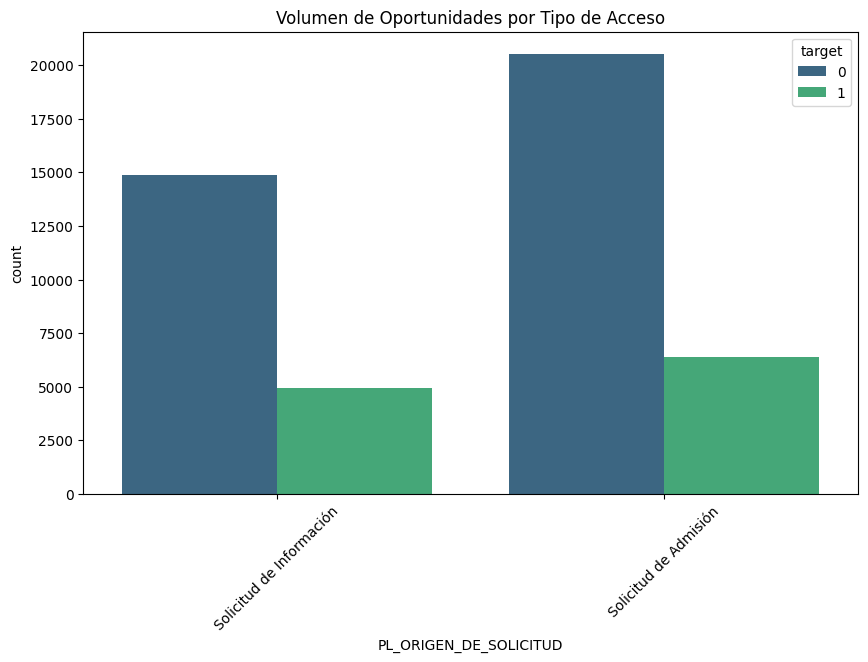

No Matriculado (0)  \
PL_CURSO_ACADEMICO PL_ORIGEN_DE_SOLICITUD                         
2022/2023          Solicitud de Admisión                   2884   
                   Solicitud de Información                2148   
2023/2024          Solicitud de Admisión                   2539   
                   Solicitud de Información                1794   
2024/2025          Solicitud de Admisión                   5083   
                   Solicitud de Información                3965   
2025/2026          Solicitud de Admisión                   5157   
                   Solicitud de Información                3622   
2026/2027          Solicitud de Admisión                   4873   
                   Solicitud de Información                3352   

                                             Matriculado (1)  Total  \
PL_CURSO_ACADEMICO PL_ORIGEN_DE_SOLICITUD                             
2022/2023          Solicitud de Admisión                1579   4463   
                   Solicitud de Información             1359   3507   
2023/2024          Solicitud de Admisión                 911   3450   
                   Solicitud de Información              604   2398   
2024/2025          Solicitud de Admisión                1824   6907   
                   Solicitud de Información             1410   5375   
2025/2026          Solicitud de Admisión                2057   7214   
                   Solicitud de Información             1567   5189   
2026/2027          Solicitud de Admisión                   0   4873   
                   Solicitud de Información                0   3352   

                                             % Fidelidad  
PL_CURSO_ACADEMICO PL_ORIGEN_DE_SOLICITUD                 
2022/2023          Solicitud de Admisión           35.38  
                   Solicitud de Información        38.75  
2023/2024          Solicitud de Admisión           26.41  
                   Solicitud de Información        25.19  
2024/2025          Solicitud de Admisión           26.41  
                   Solicitud de Información        26.23  
2025/2026          Solicitud de Admisión           28.51  
                   Solicitud de Información        30.20  
2026/2027          Solicitud de Admisión            0.00  
                   Solicitud de Información         0.00

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Resumen numérico con cálculo de porcentaje
resumen_acceso = target.groupby(['PL_CURSO_ACADEMICO', 'PL_ORIGEN_DE_SOLICITUD', 'target'])['ID'].nunique().unstack(fill_value=0)
resumen_acceso.columns = ['No Matriculado (0)', 'Matriculado (1)']

# Calcular Total y % de Matriculados (Tasa de Conversión/Fidelidad)
resumen_acceso['Total'] = resumen_acceso['No Matriculado (0)'] + resumen_acceso['Matriculado (1)']
resumen_acceso['% Fidelidad'] = (resumen_acceso['Matriculado (1)'] / resumen_acceso['Total'] * 100).round(2)


# Gráfico Global de Acceso: total
plt.figure(figsize=(10, 6))
sns.countplot(data=target.drop_duplicates('ID'), x='PL_ORIGEN_DE_SOLICITUD', hue='target', palette='viridis')
plt.title('Volumen de Oportunidades por Tipo de Acceso')
plt.xticks(rotation=45)
plt.show()
resumen_acceso

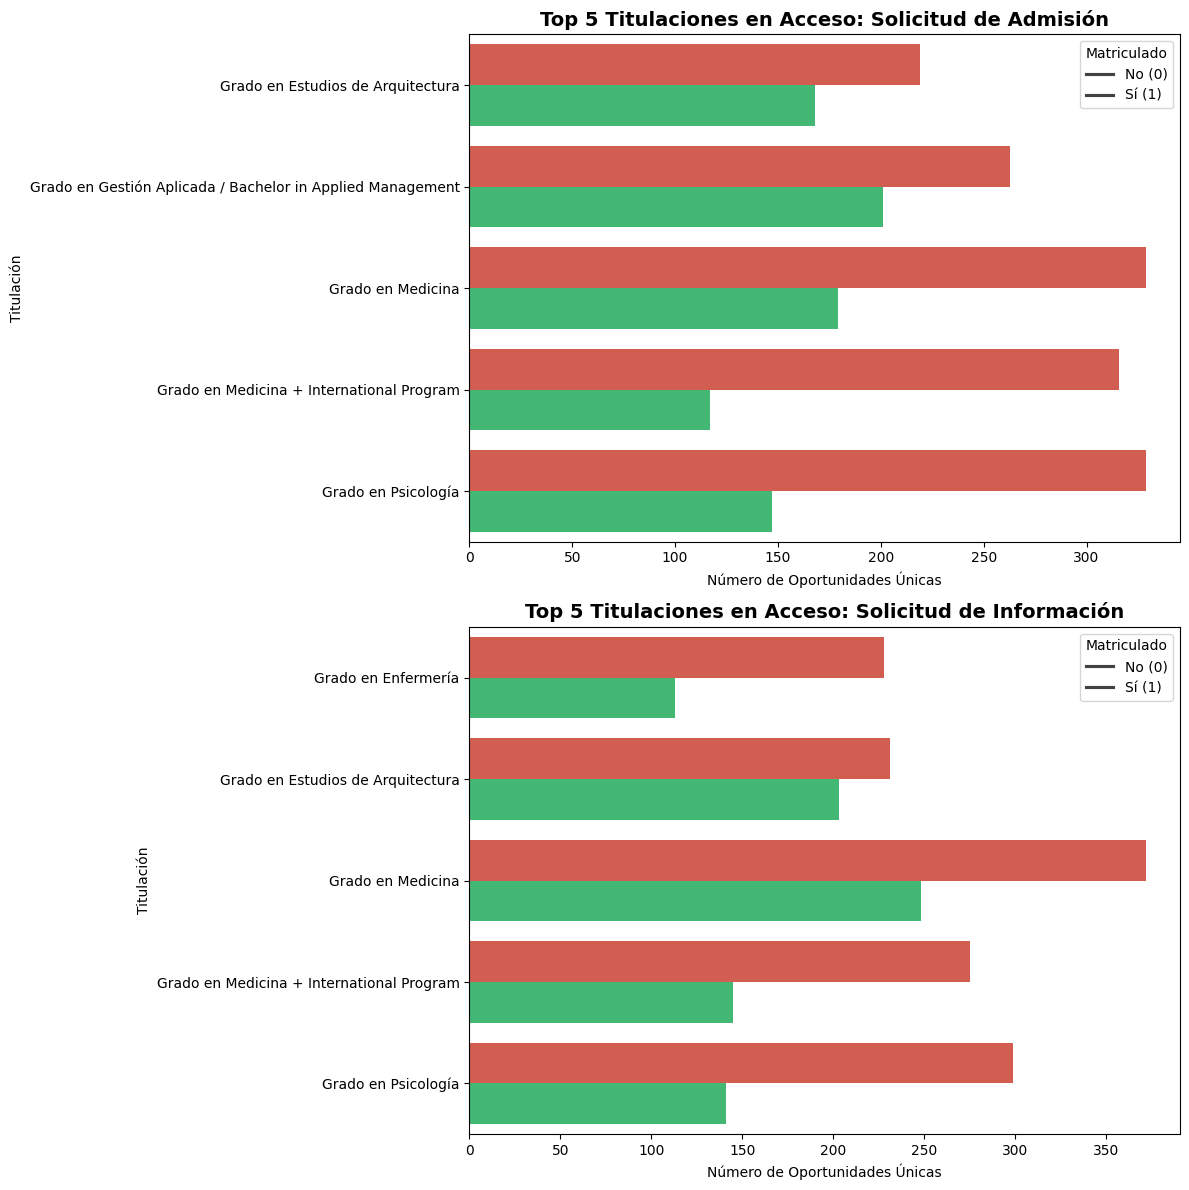

In [22]:
import utils
import matplotlib.pyplot as plt
def graficar_top_por_acceso(df, top_n=5):
    # 1. Agrupar y contar oportunidades únicas
    df_counts = df.groupby(['PL_ORIGEN_DE_SOLICITUD', 'TITULACION_DEF', 'target'])['ID'].nunique().reset_index()
    df_counts.columns = ['Acceso', 'Titulación', 'Target', 'Oportunidades']

    # 2. Obtener los tipos de acceso únicos
    accesos = df_counts['Acceso'].unique()
    
    # 3. Crear una figura con subplots (uno por cada tipo de acceso)
    fig, axes = plt.subplots(len(accesos), 1, figsize=(12, 6 * len(accesos)))
    if len(accesos) == 1: axes = [axes] # Manejo de caso con un solo acceso

    for i, acceso in enumerate(accesos):
        # Filtrar datos por acceso y coger las N titulaciones con más volumen total
        data_acceso = df_counts[df_counts['Acceso'] == acceso]
        top_titulaciones = data_acceso.groupby('Titulación')['Oportunidades'].sum().nlargest(top_n).index
        data_top = data_acceso[data_acceso['Titulación'].isin(top_titulaciones)]

        # Pintar en el subplot correspondiente
        sns.barplot(
            ax=axes[i],
            data=data_top,
            y='Titulación',
            x='Oportunidades',
            hue='Target',
            palette={0: '#e74c3c', 1: '#2ecc71'} # Rojo para No, Verde para Sí
        )
        axes[i].set_title(f'Top {top_n} Titulaciones en Acceso: {acceso}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Número de Oportunidades Únicas')
        axes[i].legend(title='Matriculado', labels=['No (0)', 'Sí (1)'])

    plt.tight_layout()
    plt.show()
graficar_top_por_acceso(target, top_n=5)

In [ ]:
columnas_seleccionadas = [
    # Identificadores y Target
    'ACCOUNTID', 'ID','ID18__PC', 'target', 'PL_CURSO_ACADEMICO',
    
    # Rendimiento Académico
    'NU_NOTA_MEDIA_ADMISION', 'NU_NOTA_MEDIA_1_BACH__PC', 'CH_PRUEBAS_CALIFICADAS', 
    'NU_RESULTADO_ADMISION_PUNTOS', 'PL_RESOLUCION_DEFINITIVA', 'TITULACION',
    
    # Compromiso Económico
    'MINIMUMPAYMENTPAYED', 'PAID_AMOUNT', 'PAID_PERCENT', 'CH_PAGO_SUPERIOR', 
    'CH_MATRICULA_SUJETA_BECA', 'CH_AYUDA_FINANCIACION', 'CU_IMPORTE_TOTAL',
    
    # Engagement y Actividad
    'CH_VISITACAMPUS__PC', 'CH_ENTREVISTA_PERSONAL__PC', 'ACC_DTT_FECHAULTIMAACTIVIDAD', 
    'NU_PREFERENCIA', 'STAGENAME', 'PL_SUBETAPA',
    
    # Perfil Sociodemográfico y Fidelidad
    'CH_HIJO_EMPLEADO__PC', 'CH_HIJO_ANTIGUO_ALUMNO__PC', 'CH_HERMANOS_ESTUDIANDO_UNAV__P', 
    'YEARPERSONBIRTHDATE', 'NAMEX', 'CH_FAMILIA_NUMEROSA__PC', 'PL_SITUACION_SOCIO_ECONOMICA',
    
    # Origen y Canal
    'LEADSOURCE', 'PL_ORIGEN_DE_SOLICITUD', 'LK_CENTROENSENANZA', 'PL_PLAZO_ADMISION'
]


# Unir la tabla con cuenta y obtener filtrar los datos que nos interesen
df_unido = pd.merge(
    target, 
    cuenta, 
    left_on='ACCOUNTID', 
    right_on='ID18', 
    how='left',
    suffixes=('', '_cuenta')
)		
columnas_finales =  [col for col in columnas_seleccionadas if col in df_unido.columns]
df_unido_filtrado =  df_unido[columnas_finales].copy()


In [ ]:
from utils import calcular_tiempos_etapas, limpiar_historial_por_hitos
import numpy as np
import pandas as pd

historial_etapas_tiempo = calcular_tiempos_etapas(historial_etapas)

import pandas as pd
import numpy as np


df_final = limpiar_historial_por_hitos(historial_etapas_tiempo, df_unido_filtrado)

ejemplo_id = '0066900001k7yTgAAI'

columnas_comprobacion = [
    'LK_Oportunidad__c', 'CreatedDate', 'PL_Etapa__c', 'PL_Subetapa__c',
    'fecha_pruebas_calificadas', 'NU_NOTA_MEDIA_ADMISION',
    'fecha_matricula_iniciada', 'PAID_AMOUNT','NU_NOTA_MEDIA_ADMISION', 'CH_PRUEBAS_CALIFICADAS', 
        'NU_RESULTADO_ADMISION_PUNTOS', 'PL_RESOLUCION_DEFINITIVA'
]

print("--- COMPROBACIÓN DE LÓGICA TEMPORAL ---")
df_final[df_final['LK_Oportunidad__c'] == ejemplo_id][columnas_comprobacion].sort_values('CreatedDate')
df_final.head(50)

In [ ]:
import pandas as pd
import numpy as np
from utils import integrar_actividades_progresivo_por_curso
# Ejecución
df_final_v3 = integrar_actividades_progresivo_por_curso(df_final, historial_actividad)
# ==========================================
# EJECUCIÓN
# ==========================================
# Print de comprobación para ver la evolución de un contacto
ejemplo_acc = df_final_v3[df_final_v3['num_asistencias_acum'] > 0]['ID18__PC'].iloc[1]
cols_print = ['ID','ID18__PC','ACCOUNTID', 'CreatedDate', 'PL_Etapa__c', 'num_asistencias_acum', 'num_solicitudes_acum']

print("\n--- COMPROBACIÓN DE EVOLUCIÓN DE ACTIVIDADES ---")
df_final_v3[df_final_v3['ID18__PC'] == ejemplo_acc][cols_print].sort_values('CreatedDate')
#historial_actividad.loc[historial_actividad['ContactId']=='003690000312P6pAAE',]

In [ ]:
# ===============================
# 3. GUARDAR EXCEL LIMPIO
# ===============================
df_final_v3.to_csv(r"..\datos\02. Datos tratamiento preliminar\01_datos_tratamiento_preliminar.csv",sep=";")

print("Archivo limpio guardado como '01_datos_tratamiento_preliminar.csv'")